In [48]:
########################################This is the Preprocessing step###################################################
#It includes:
#   1-Converting images to gray scale
#   2-Separating the text from the background using threshold i.e converting to binary images
#   3-Extracting following images from the input image: a-Edge image
#                                                       b-Skeleton image
#                                                       c-Diacritics image
#                                                       d-No-Diacritics image
# input : image
# output : binary input image + set of images extracted from it(Edge image,Skeleton image,Diacritics image,No-Diacritics image)

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize


In [50]:
#   1-Converting images to gray scale
def convertToGrayScale(image): 
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayImage


In [58]:
#   2-Separating the text from the background using threshold i.e converting to binary images
def convertToBinary(image): 
    ret, binaryImage = cv2.threshold(image, 127, 1, cv2.THRESH_BINARY)

    # if the background is black invert it
    count1 = 0
    count0 = 0
    M,N = binaryImage.shape
    for i in range(M):
        for j in range(N):
            if binaryImage[i,j] == 1:
                count1 = count1 + 1
            else:
                count0 = count0 + 1   
    if  count0 > count1:
        binaryImage = 1 - binaryImage
        
    return binaryImage


In [59]:
#   3-Extracting following images from the input image: a- Edge image
def getEdgeImage(image):
    # using laplacian with (3,3) filter
    edgeImage = cv2.Laplacian(image, cv2.CV_16S, ksize=3)
    abs_edgeImage = cv2.convertScaleAbs(edgeImage)
    inverse_abs_edgeImage=255-abs_edgeImage
    return inverse_abs_edgeImage


In [60]:
#   3-Extracting following images from the input image: b- Skeleton image
def getSkeletonImage(image):
    skeletonImage = skeletonize(1 - image)
    Inv_skeletonImage = 1 - skeletonImage
    return Inv_skeletonImage


In [70]:
#   3-Extracting following images from the input image: c- Diacritics image
#                                                       d- No-Diacritics image
def getDiacriticsImage(image):
    text = image.copy()
    diacritic = image.copy()
    #getting contours of all regions
    contours = cv2.findContours(text, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    #removing the small regions(diacritics)
    for contour in contours:
        #calculating area of each regioin
        area = cv2.contourArea(contour)
        
        if area < 80:
            cv2.drawContours(text, [contour], -1, (1,1,1), -1)
    
    #dilating and inverting the text image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    textImageDilated = 1-cv2.dilate(1-text,kernel)

    #Extracting the removed diacritics and inverting it
    #print(diacritic)
    #print(text)
    diacriticImage = diacritic - text
    #print(diacriticImage)
    diacriticImageInv = 255 - diacriticImage
    #print(diacriticImageInv)

    return textImageDilated,diacriticImageInv


In [71]:
# preprocessing Function:
def preprocessing(image):
    gImage = convertToGrayScale(image)
    bImage = convertToBinary(gImage)
    edgeImage = getEdgeImage(bImage)
    skelImage = getSkeletonImage(bImage)
    TextImage,diacImage = getDiacriticsImage(bImage)
    return bImage, edgeImage, skelImage, TextImage, diacImage


Text(0.5, 1.0, 'Diacritics Image')

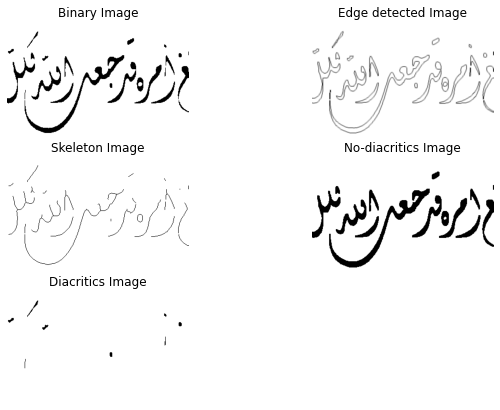

In [72]:
#Testing the functions
img = cv2.imread('../ACdata_base/1/0019.jpg')

Bimg, EdgeImage, SImage, TImage, DImage = preprocessing(img)

rows = 3 
cols = 2
fig = plt.figure(figsize = (10, 7))


fig.add_subplot(rows, cols, 1)
plt.imshow(Bimg,'gray')
plt.axis('off')
plt.title("Binary Image")


fig.add_subplot(rows, cols, 2)
plt.imshow(EdgeImage,'gray')
plt.axis('off')
plt.title("Edge detected Image")

fig.add_subplot(rows, cols, 3)
plt.imshow(SImage,'gray')
plt.axis('off')
plt.title("Skeleton Image")
  

fig.add_subplot(rows, cols, 4)
plt.imshow(TImage,'gray')
plt.axis('off')
plt.title("No-diacritics Image")


fig.add_subplot(rows, cols, 5)
plt.imshow(DImage,'gray')
plt.axis('off')
plt.title("Diacritics Image")


